In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

# SPX

In [2]:
SPX = blp.bdh(["SPX Index"], start_date="20000101", end_date= pd.to_datetime("today").strftime("%Y%m%d"))
SPX = (SPX / SPX.shift(1) -1).iloc[1:]

# Basket

In [59]:
Liste = ["AAPL US","ABMD US","ABT US","ADBE US","ALGN US","APD US","ATVI US","BAC US","BG US","CSCO US","DG US","DIS US","EA US","EQIX US","FB US","FCX US","FTCH US","HAS US","HD US","HON US","ISRG US","ITT US","JPM US","LHX US","MA US","MCD US","MDLZ US","MNST US","MSFT US","MU US","NKE US","TTWO US","VRTX US","WY US","XLNX US"]
Liste = ["DLR US", "COR US", "NVDA US", "AMD US", "INTC US", "AMZN US", "MSFT US", "VEEV US", "DOCU US","CTXS US", "OKTA US", "ZS US", "SHOP CN", "AKAM US", "COUP US", "TWLO US", "WDAY US", "AMT US", "CCI US", "SBAC US", "KEYS US", "ADI US", "CIEN US", "MRVL US", "VZ US"]                      
Liste = ["LYB US" ,"GM US" ,"VICI US" ,"T US" ,"REG US" ,"WRK US" ,"IP US" ,"IPG US" ,"PM US" ,"IBM US" ,"HFC US" ,"WHR US" ,"EMN US" ,"GPC US" ,"TAP US" ,"EIX US" ,"AVGO US" ,"DUK US" ,"CF US" ,"NTAP US" ,"VIAC US" ]
#Liste = ['LYB US','GM US','HRB US','VICI US','FL US','NUS US','T US','REG US','WRK US','IP US','IPG US','LEG US','PAG US','PM US','SBGI US','DKS US','IBM US','HFC US','WHR US','EMN US','PII US','XRX US','CBT US','OGE US','ARD US','OMC US','GPC US','ESRT US','TAP US','HUN US','EIX US','AVGO US','DUK US','CF US','NTAP US','VIAC US','EAF US']
df = blp.bdh([x + " Equity" for x in Liste], start_date="20000101", end_date= pd.to_datetime("today").strftime("%Y%m%d"))

Ret = (df/df.shift(1)-1).iloc[1:]

In [56]:
Reasonable = Ret.copy()

In [58]:
G5 = Ret.copy()

In [60]:
Income = Ret.copy()

In [63]:
test = pd.concat((Reasonable.T.mean(), G5.T.mean(), Income.T.mean()), axis=1)
test.columns = ["Reasonable", "5G", "Income"]

In [69]:
test[-252*3:].corr().iloc[1,0]

0.8775309228309682

In [70]:
Corr = {}
for x in range(len(test)-252):
    Pointer = test[x:x+252].corr()
    Corr[test.index[252+x]] =  [Pointer.iloc[1,0], Pointer.iloc[2,0], Pointer.iloc[2,1]]

In [73]:
Runner = pd.DataFrame(Corr).T
Runner.columns = ["Reasonable/5G", "Reasonable/Income", "5G/Income"]

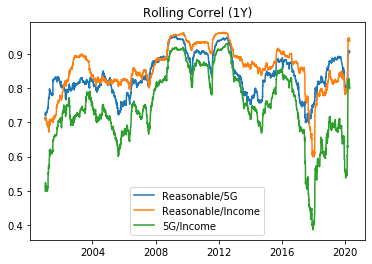

In [78]:
plt.plot(Runner)
plt.title("Rolling Correl (1Y)")
plt.legend(["Reasonable/5G", "Reasonable/Income", "5G/Income"])

In [79]:
test = pd.concat((SPX.T.mean(), Reasonable.T.mean(), G5.T.mean(), Income.T.mean()), axis=1)
test.columns = ["SPX", "Reasonable", "5G", "Income"]

In [80]:
test

,SPX,Reasonable,5G,Income
2000-01-04,-0.038345,-0.041966,-0.039582,-0.030554
2000-01-05,0.001922,0.006597,-0.022516,0.020936
2000-01-06,0.000956,-0.008203,-0.043778,-0.003844
2000-01-07,0.027090,0.023926,0.056442,0.038097
2000-01-10,0.011190,0.026871,0.073044,0.010179
...,...,...,...,...
2020-04-20,-0.017881,-0.015778,0.001778,-0.027099
2020-04-21,-0.030675,-0.031518,-0.038643,-0.030067
2020-04-22,0.022930,0.026568,0.036566,0.010019
2020-04-23,-0.000539,-0.004377,-0.007969,0.013827


In [84]:
Beta = {}
for x in range(len(test)-252*3):
    Pointer = test[x:x+252*3].cov()
    Beta[test.index[252*3+x]] =  [Pointer.iloc[1,0]/Pointer.iloc[0,0], Pointer.iloc[2,0]/Pointer.iloc[0,0], Pointer.iloc[3,0]/Pointer.iloc[0,0]  ]

In [98]:
ReasonableHedged = Reasonable.T.mean() - pd.DataFrame(Beta).T.iloc[:,0] * SPX.T.mean()
G5Hedged = G5.T.mean() - pd.DataFrame(Beta).T.iloc[:,1] * SPX.T.mean()
IncomeHedged = Income.T.mean() - pd.DataFrame(Beta).T.iloc[:,2] * SPX.T.mean()

In [102]:
testo = pd.concat((ReasonableHedged, G5Hedged, IncomeHedged), axis=1).dropna()

In [104]:
corrbh = {}
for x in range(len(testo)-252):
    Pointer = testo[x:x+252].corr()
    corrbh[testo.index[252+x]] =  [Pointer.iloc[1,0], Pointer.iloc[2,0], Pointer.iloc[2,1]]

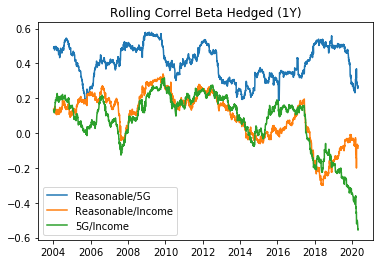

In [105]:
plt.plot(pd.DataFrame(corrbh).T)
plt.title("Rolling Correl Beta Hedged (1Y)")
plt.legend(["Reasonable/5G", "Reasonable/Income", "5G/Income"])

In [109]:
testo[-252*3:].corr().to_clipboard()

# Graphs

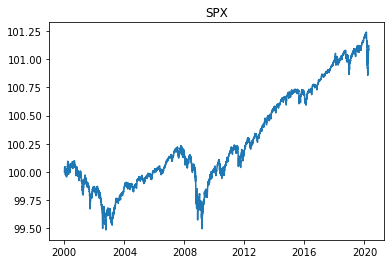

In [4]:
test = SPX.copy()
test.iloc[0] = 100
plt.title("SPX")
plt.plot(test.cumsum())


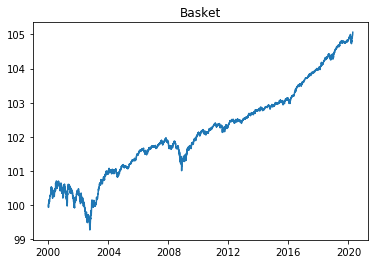

In [60]:
testo = Ret.T.mean().copy()
testo.iloc[0] = 100
plt.title("Basket")
plt.plot(testo.cumsum())

# Functions

In [25]:
for x in Ret.columns:
    print(x, Ret[x].isnull().sum()/ len(Ret))

('DOCU US Equity', 'Last_Price') 0.9047804878048781
('WDAY US Equity', 'Last_Price') 0.6355121951219512
('DLR US Equity', 'Last_Price') 0.24448780487804878
('VZ US Equity', 'Last_Price') 0.008195121951219513
('CTXS US Equity', 'Last_Price') 0.008195121951219513
('COR US Equity', 'Last_Price') 0.5342439024390244
('AMT US Equity', 'Last_Price') 0.008195121951219513
('OKTA US Equity', 'Last_Price') 0.8538536585365853
('ZS US Equity', 'Last_Price') 0.8991219512195122
('SHOP CN Equity', 'Last_Price') 0.7642926829268293
('NVDA US Equity', 'Last_Price') 0.008195121951219513
('AKAM US Equity', 'Last_Price') 0.008195121951219513
('CCI US Equity', 'Last_Price') 0.008195121951219513
('AMD US Equity', 'Last_Price') 0.008195121951219513
('COUP US Equity', 'Last_Price') 0.8296585365853658
('TWLO US Equity', 'Last_Price') 0.8156097560975609
('INTC US Equity', 'Last_Price') 0.008195121951219513
('SBAC US Equity', 'Last_Price') 0.008195121951219513
('KEYS US Equity', 'Last_Price') 0.7344390243902439
('

In [26]:
len(Ret.columns)

25

In [16]:
Ret[Ret.columns[0]].isnull().sum() / len(Ret)

0.9047804878048781

# Ret

In [4]:
def AnnRet(Ret):
    return pd.DataFrame(Ret).T.mean().mean() * 252

In [70]:
pd.DataFrame(SPX).T.mean().mean()

0.00021201815715114435

In [75]:
SPX.mean() * 252

ticker     field     
SPX Index  Last_Price    0.053429
dtype: float64

In [72]:
SPX.T.mean().mean() * 252

0.05342857560208838

In [24]:
Ret.T.mean().mean() * 252

0.24709080004689146

# Vol

In [5]:
def AnnVol(Ret):
    return pd.DataFrame(Ret).T.mean().std() * np.sqrt(252)

In [26]:
SPX.T.mean().std() * np.sqrt(252)

22.220885029561796

In [27]:
Ret.T.mean().std() * np.sqrt(252)

0.3249352149288965

# Sharpe

In [6]:
def Sharpe(Ret):
    return np.sqrt(252) * (pd.DataFrame(Ret).T.mean().mean()) / (pd.DataFrame(Ret).T.mean().std())

In [29]:
np.sqrt(252) * SPX.T.mean().mean() / Ret.T.mean().std()

15.36498851697634

In [30]:
np.sqrt(252) * (Ret.T.mean().mean()) / (Ret.T.mean().std())

0.7604309680653136

# All

In [7]:
def All(Ret):
    return AnnRet(Ret), AnnVol(Ret), Sharpe(Ret)

Ret.T.mean()

In [11]:
SPX

ticker,SPX Index
field,Last_Price
2000-01-04,100.000000
2000-01-05,0.001922
2000-01-06,0.000956
2000-01-07,0.027090
2000-01-10,0.011190
...,...
2020-04-13,-0.010105
2020-04-14,0.030573
2020-04-15,-0.022030


In [13]:
All(SPX)

(0.05342857560208838, 0.19891104725308792, 0.2686053707922397)

# Excess Returns

In [180]:
(Ret.T.mean() - SPX.T.mean()).mean() * 252

0.13576834254685266

In [181]:
(Ret.T.mean() - SPX.T.mean()).std() * np.sqrt(252)

0.07881960987382852

# Info Ratio

In [182]:
np.sqrt(252) * (Ret.T.mean() - SPX.T.mean()).mean() / (Ret.T.mean() - SPX.T.mean()).std()

1.7225198496184588

# Per Month

In [8]:
RetDico = {}
VolDico = {}
positive = pd.Series()
negative = pd.Series()

for annum in SPX.index.year.unique():
    RetDico[annum] = {}
    VolDico[annum] = {}
    for mensis in SPX[SPX.index.year == annum].index.month.unique():
        RetDico[annum][mensis] = SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean().mean()
        VolDico[annum][mensis]= SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean().std()
        if SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean().mean() > 0:
            positive = pd.concat((positive, (SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean())), axis=0)
        else: 
            negative = pd.concat((negative, (SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean())), axis=0)
                      
        

C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [9]:
RetDicoRet = {}
VolDicoRet = {}
RetData = {}
positiveRet = pd.Series()
negativeRet = pd.Series()

for annum in SPX.index.year.unique():
    RetDicoRet[annum] = {}
    VolDicoRet[annum] = {}
    for mensis in SPX[SPX.index.year == annum].index.month.unique():
        RetDicoRet[annum][mensis] = Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean().mean()
        VolDicoRet[annum][mensis]= Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean().std()
        if SPX[(SPX.index.year == annum) & (SPX.index.month == mensis)].T.mean().mean() > 0:
            positiveRet = pd.concat((positiveRet, Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean()), axis=0)
        else: 
            negativeRet = pd.concat((negativeRet, Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean()), axis=0)
                     

C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [247]:
positive.mean() * 252

0.354894722718389

In [ ]:
positive.std() * np.252

In [256]:
SPX[SPX.index < pd.to_datetime("15-05-2008")]

ticker,SPX Index
field,Last_Price
2000-01-04,-0.038345
2000-01-05,0.001922
2000-01-06,0.000956
2000-01-07,0.027090
2000-01-10,0.011190
...,...
2008-05-08,0.003669
2008-05-09,-0.006725
2008-05-12,0.011021


In [261]:
SPX[(SPX.index > pd.to_datetime("15-05-2008")) & (SPX.index < pd.to_datetime("03-05-2009"))]

ticker,SPX Index
field,Last_Price
2008-05-16,0.001250
2008-05-19,0.000898
2008-05-20,-0.009274
2008-05-21,-0.016053
2008-05-22,0.002617
...,...
2009-02-26,-0.015780
2009-02-27,-0.023564
2009-03-02,-0.046620


In [280]:
positive.mean() * 252

0.354894722718389

In [285]:
AnnRet(positive)

0.354894722718389

In [286]:
AnnVol(positive)

0.15184500816721538

In [287]:
Sharpe(positive)

2.337216922716158

In [289]:
All(positive)

(0.354894722718389, 0.15184500816721538, 2.337216922716158)

In [303]:
Ret.T.mean()

2000-01-04   -0.041966
2000-01-05    0.006597
2000-01-06   -0.008203
2000-01-07    0.023926
2000-01-10    0.026871
                ...   
2020-04-03   -0.014283
2020-04-06    0.072355
2020-04-07    0.002597
2020-04-08    0.030438
2020-04-09    0.016598
Length: 5099, dtype: float64

In [297]:
SPX.T.mean()

2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-04-03   -0.015137
2020-04-06    0.070331
2020-04-07   -0.001603
2020-04-08    0.034056
2020-04-09    0.014487
Length: 5099, dtype: float64

In [298]:
Ret.T.mean() - SPX.T.mean()

2000-01-04   -0.003622
2000-01-05    0.004674
2000-01-06   -0.009158
2000-01-07   -0.003165
2000-01-10    0.015681
                ...   
2020-04-03    0.000854
2020-04-06    0.002024
2020-04-07    0.004200
2020-04-08   -0.003618
2020-04-09    0.002111
Length: 5099, dtype: float64

In [376]:
positiveRet

2000-03-01    0.015969
2000-03-02   -0.014323
2000-03-03    0.027805
2000-03-06   -0.013941
2000-03-07   -0.015901
                ...   
2020-04-03   -0.014283
2020-04-06    0.072355
2020-04-07    0.002597
2020-04-08    0.030438
2020-04-09    0.016598
Length: 3176, dtype: float64

In [300]:
positive

2000-03-01    0.009346
2000-03-02    0.001863
2000-03-03    0.019837
2000-03-06   -0.012695
2000-03-07   -0.025631
                ...   
2020-04-03   -0.015137
2020-04-06    0.070331
2020-04-07   -0.001603
2020-04-08    0.034056
2020-04-09    0.014487
Length: 3176, dtype: float64

In [377]:
negativeRet

2000-01-04   -0.041966
2000-01-05    0.006597
2000-01-06   -0.008203
2000-01-07    0.023926
2000-01-10    0.026871
                ...   
2020-03-25    0.013868
2020-03-26    0.053795
2020-03-27   -0.038713
2020-03-30    0.036591
2020-03-31   -0.009771
Length: 1923, dtype: float64

In [302]:
negative

2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-03-25    0.011535
2020-03-26    0.062414
2020-03-27   -0.033687
2020-03-30    0.033516
2020-03-31   -0.016013
Length: 1923, dtype: float64

In [304]:
SPX[SPX.index < pd.to_datetime("15-05-2008")].T.mean()

2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2008-05-08    0.003669
2008-05-09   -0.006725
2008-05-12    0.011021
2008-05-13   -0.000385
2008-05-14    0.004006
Length: 2102, dtype: float64

In [306]:
SPX[(SPX.index > pd.to_datetime("15-05-2008")) & (SPX.index < pd.to_datetime("03-05-2009"))].T.mean()

2008-05-16    0.001250
2008-05-19    0.000898
2008-05-20   -0.009274
2008-05-21   -0.016053
2008-05-22    0.002617
                ...   
2009-02-26   -0.015780
2009-02-27   -0.023564
2009-03-02   -0.046620
2009-03-03   -0.006407
2009-03-04    0.023753
Length: 201, dtype: float64

In [307]:
SPX[(SPX.index > pd.to_datetime("03-05-2009")) & (SPX.index < pd.to_datetime("14-02-2020"))].T.mean()

2009-03-06    0.001216
2009-03-09   -0.010024
2009-03-10    0.063663
2009-03-11    0.002446
2009-03-12    0.040729
                ...   
2020-02-07   -0.005401
2020-02-10    0.007326
2020-02-11    0.001688
2020-02-12    0.006463
2020-02-13   -0.001630
Length: 2755, dtype: float64

In [308]:
SPX[SPX.index > pd.to_datetime("14-02-2020")].T.mean()

2020-02-18   -0.002920
2020-02-19    0.004706
2020-02-20   -0.003816
2020-02-21   -0.010518
2020-02-24   -0.033514
2020-02-25   -0.030280
2020-02-26   -0.003779
2020-02-27   -0.044163
2020-02-28   -0.008238
2020-03-02    0.046039
2020-03-03   -0.028108
2020-03-04    0.042203
2020-03-05   -0.033922
2020-03-06   -0.017054
2020-03-09   -0.075970
2020-03-10    0.049396
2020-03-11   -0.048868
2020-03-12   -0.095113
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
2020-03-20   -0.043360
2020-03-23   -0.029294
2020-03-24    0.093828
2020-03-25    0.011535
2020-03-26    0.062414
2020-03-27   -0.033687
2020-03-30    0.033516
2020-03-31   -0.016013
2020-04-01   -0.044142
2020-04-02    0.022829
2020-04-03   -0.015137
2020-04-06    0.070331
2020-04-07   -0.001603
2020-04-08    0.034056
2020-04-09    0.014487
dtype: float64

In [44]:
TimeSeries = [Ret.T.mean(),
              SPX.T.mean(),
              Ret.T.mean() - SPX.T.mean(),
              
              positiveRet,
              positive,
              positiveRet - positive,
              
              negativeRet,
              negative,
              negativeRet - negative,
              
              Ret[Ret.index < pd.to_datetime("15-05-2008")].T.mean(),
              SPX[SPX.index < pd.to_datetime("15-05-2008")].T.mean(),
              Ret[Ret.index < pd.to_datetime("15-05-2008")].T.mean() - SPX[SPX.index < pd.to_datetime("15-05-2008")].T.mean(),
              
              Ret[(Ret.index > pd.to_datetime("15-05-2008")) & (Ret.index < pd.to_datetime("03-05-2009"))].T.mean(),
              SPX[(SPX.index > pd.to_datetime("15-05-2008")) & (SPX.index < pd.to_datetime("03-05-2009"))].T.mean(),
              Ret[(Ret.index > pd.to_datetime("15-05-2008")) & (Ret.index < pd.to_datetime("03-05-2009"))].T.mean() - SPX[(SPX.index > pd.to_datetime("15-05-2008")) & (SPX.index < pd.to_datetime("03-05-2009"))].T.mean(),
              
              Ret[(Ret.index > pd.to_datetime("03-05-2009")) & (Ret.index < pd.to_datetime("14-02-2020"))].T.mean(),
              SPX[(SPX.index > pd.to_datetime("03-05-2009")) & (SPX.index < pd.to_datetime("14-02-2020"))].T.mean(),
              Ret[(Ret.index > pd.to_datetime("03-05-2009")) & (Ret.index < pd.to_datetime("14-02-2020"))].T.mean() - SPX[(SPX.index > pd.to_datetime("03-05-2009")) & (SPX.index < pd.to_datetime("14-02-2020"))].T.mean(),
              
              Ret[Ret.index > pd.to_datetime("14-02-2020")].T.mean(),
              SPX[SPX.index > pd.to_datetime("14-02-2020")].T.mean(),
              Ret[Ret.index > pd.to_datetime("14-02-2020")].T.mean() - SPX[SPX.index > pd.to_datetime("14-02-2020")].T.mean()
             ]

In [10]:

def getRet(Ret):
    TimeSeries = [Ret[(Ret.index > pd.to_datetime("18-02-2020")) & (Ret.index < pd.to_datetime("22-03-2020"))].T.mean(),
                  SPX[(SPX.index > pd.to_datetime("18-02-2020")) & (SPX.index < pd.to_datetime("22-03-2020"))].T.mean(),
                  Ret[(Ret.index > pd.to_datetime("18-02-2020")) & (Ret.index < pd.to_datetime("22-03-2020"))].T.mean() - SPX[(SPX.index > pd.to_datetime("18-02-2020")) & (SPX.index < pd.to_datetime("22-03-2020"))].T.mean(),

                  Ret[Ret.index > pd.to_datetime("22-03-2020")].T.mean(),
                  SPX[SPX.index > pd.to_datetime("22-03-2020")].T.mean(),
                  Ret[Ret.index > pd.to_datetime("22-03-2020")].T.mean() - SPX[SPX.index > pd.to_datetime("22-03-2020")].T.mean(),

                    Ret[Ret.index > pd.to_datetime("18-02-2020")].T.mean(),
                  SPX[SPX.index > pd.to_datetime("18-02-2020")].T.mean(),
                  Ret[Ret.index > pd.to_datetime("18-02-2020")].T.mean() - SPX[SPX.index > pd.to_datetime("18-02-2020")].T.mean()
                 ]
    result = []
    for x in TimeSeries:
        result.append(GetRetPercentage(x))
    return result

In [45]:
def GetRetPercentage(df):
    Pointer = pd.DataFrame(df).T.mean()
    Pointer = Pointer + 1
    Pointer[0] = 100
    return (Pointer.cumprod()[-1] / 100 - 1) 

In [51]:
result = []

for x in TimeSeries:
    result.append(All(x))

In [47]:
result

[(0.11030636189419571, 0.22229051870579736, 0.4962261212777444),
 (0.05277221021634783, 0.1990599076003963, 0.2651071772940116),
 (0.05753415167784794, 0.08553861232314895, 0.6726102997847876),
 (0.4356013260885958, 0.17902167690060916, 2.4332322969493627),
 (0.35526787540599186, 0.15270396041624323, 2.326513827392533),
 (0.0803334506826034, 0.0779072013653012, 1.0311428118939314),
 (-0.4544108970566364, 0.27251641941304405, -1.6674624524840134),
 (-0.4483984550432507, 0.2550843522095286, -1.7578438314982656),
 (-0.006012442013385842, 0.09490470080446435, -0.06335241523782366),
 (0.13685236672767395, 0.18111803270270166, 0.7555976877924238),
 (0.012162289181932648, 0.17933648054901613, 0.06781826622614276),
 (0.12469007754574121, 0.08300433670766853, 1.5022116011225406),
 (-0.8850246590186839, 0.4968727097692273, -1.781189913669708),
 (-0.7570518610025585, 0.46697349287636525, -1.6211880814463995),
 (-0.12797279801612568, 0.13927800131412552, -0.9188299430539483),
 (0.1960772593241042,

In [48]:
pd.DataFrame(result).T.to_clipboard()

In [52]:
pd.DataFrame(getRet(Ret)).T.to_clipboard()

In [49]:
lista = []
for z in Ret.columns:
    lista.append([z, (getRet(pd.DataFrame(Ret[z])))])


In [50]:
pd.DataFrame(lista).to_clipboard()

In [228]:
Pointer = SPX[SPX.index > pd.to_datetime("22-03-2020")].T.mean()

In [229]:
Pointer = Pointer + 1

In [230]:
Pointer[0] = 100

In [231]:
Pointer.cumprod()

2020-03-23    100.000000
2020-03-24    109.382766
2020-03-25    110.644498
2020-03-26    117.550282
2020-03-27    113.590328
2020-03-30    117.397426
2020-03-31    115.517565
2020-04-01    110.418343
2020-04-02    112.939126
2020-04-03    111.229552
2020-04-06    119.052472
2020-04-07    118.861625
2020-04-08    122.909627
2020-04-09    124.690265
2020-04-13    123.430321
2020-04-14    127.203897
2020-04-15    124.401537
2020-04-16    125.125145
2020-04-17    128.477697
dtype: float64

In [35]:
SPX

ticker,SPX Index
field,Last_Price
2000-01-04,-0.038345
2000-01-05,0.001922
2000-01-06,0.000956
2000-01-07,0.027090
2000-01-10,0.011190
...,...
2020-04-20,-0.017881
2020-04-21,-0.030675
2020-04-22,0.022930


In [36]:
Ret

ticker,AVGO US Equity,PM US Equity,LYB US Equity,GM US Equity,VICI US Equity,DUK US Equity,IBM US Equity,CF US Equity,HFC US Equity,T US Equity,...,WHR US Equity,REG US Equity,VIAC US Equity,WRK US Equity,EMN US Equity,IP US Equity,GPC US Equity,IPG US Equity,TAP US Equity,EIX US Equity
field,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,...,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price
2000-01-04,NaN,NaN,NaN,NaN,NaN,0.015545,-0.033944,NaN,0.009159,-0.058511,...,-0.038422,0.003135,-0.057080,NaN,-0.024226,-0.024776,-0.010390,-0.079402,-0.012350,0.009975
2000-01-05,NaN,NaN,NaN,NaN,NaN,0.040816,0.035137,NaN,0.013614,0.015537,...,0.014721,-0.006250,-0.044237,NaN,0.049655,0.034643,-0.005249,-0.022500,0.047461,0.064198
2000-01-06,NaN,NaN,NaN,NaN,NaN,0.026961,-0.017241,NaN,-0.013431,-0.026426,...,0.008290,0.006289,-0.003656,NaN,0.063075,0.020090,0.000000,0.002558,-0.011938,-0.002320
2000-01-07,NaN,NaN,NaN,NaN,NaN,0.026253,-0.004386,NaN,0.004538,0.008571,...,0.003075,0.034375,0.058680,NaN,-0.002472,0.026259,0.065963,0.035714,0.021732,0.041860
2000-01-10,NaN,NaN,NaN,NaN,NaN,-0.001163,0.039648,NaN,-0.004518,0.014164,...,0.012295,0.003021,0.090071,NaN,-0.030981,-0.002133,-0.012376,0.030788,-0.038951,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,-0.028584,-0.014110,-0.072428,-0.004448,-0.025482,-0.038291,0.002414,-0.026158,-0.029608,-0.008005,...,-0.050603,-0.038024,-0.017722,-0.033561,-0.027042,-0.033595,-0.019692,-0.022576,-0.020054,-0.033033
2020-04-21,-0.041157,-0.059589,-0.036769,-0.050938,-0.021046,-0.013964,-0.030313,-0.025045,0.013730,-0.035830,...,-0.018200,-0.043022,-0.023840,-0.019892,-0.016601,-0.021442,-0.029243,-0.046875,-0.031961,-0.030328
2020-04-22,0.049748,0.010791,0.031739,0.002825,0.009772,0.020014,0.021840,0.016754,0.011287,-0.013391,...,0.011917,-0.004215,-0.014521,-0.020640,0.021813,-0.004980,0.026182,0.000713,0.000000,0.013748


In [53]:
CorrelRoll = {}

for x in range(len(Ret)-3*252):
    Pointer = pd.concat((SPX.T.mean(), Ret.T.mean()), axis = 1).iloc[x:x+252*3]
    CorrelRoll[SPX.index[3*252+x]] = Pointer.cov().iloc[1,0] / Pointer.cov().iloc[0,0]

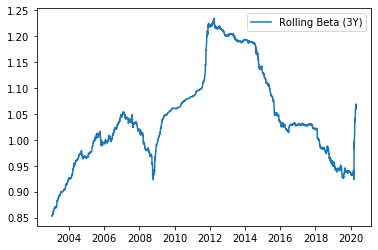

In [54]:
plt.plot(pd.Series(CorrelRoll))
plt.legend(["Rolling Beta (3Y)"])

In [50]:
Pointer = Ret.T.mean()

In [51]:
Pointer = Pointer + 1

In [53]:
Pointer[0] = 100

In [58]:
(Pointer.cumprod()[-1] / 100) - 1

3.925933118467775

In [30]:
results = []

for x in TimeSeries:
    results.append(All(x))

In [196]:
pd.DataFrame(result).T.to_clipboard()

# By Hand

In [33]:
test = Ret.T.mean() - SPX.T.mean()

In [34]:
Volo = test.std() * np.sqrt(252)

In [35]:
test = test + 1
test[0] = 100
Reto = (test.cumprod()[-1] / 100 - 1) * 252
Reta = (test.cumprod()[-1] / 100 - 1)

In [36]:
print(Reta)
print(Volo)
print(np.sqrt(252)*Reto/Volo)

24.64295388724049
22.230003947329223
4434.595742661487


In [52]:
SPX[:-5].mean() * 252

ticker     field     
SPX Index  Last_Price    4.995987
dtype: float64

In [365]:
test = SPX.T.mean()
test = test * 100
test[0] = 100

In [366]:
testo = Ret.T.mean()
testo = testo * 100
testo[0] = 100

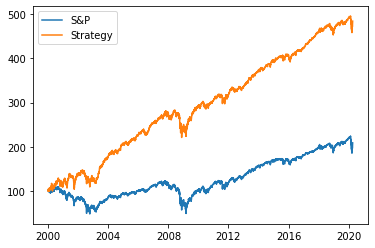

In [367]:
plt.plot(test.cumsum())
plt.plot(testo.cumsum())
plt.legend(["S&P", "Strategy"])
plt.show()

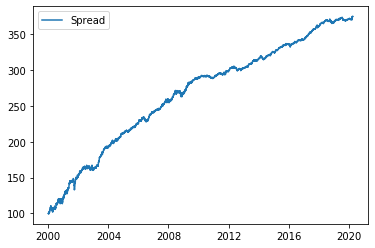

In [362]:
test = Ret.T.mean() - SPX.T.mean()
test = test * 100
test[0] = 100

plt.plot(test.cumsum())
plt.legend(["Spread"])

In [27]:
RollCorrel = {}
for x in range(len(Pointer)-252*3):
    RollCorrel[Pointer.index[252*3+x]] = (pd.DataFrame(np.cov(Pointer.iloc[x:x+252*3].T)).iloc[0,1] / pd.DataFrame(np.cov(Pointer.iloc[x:x+252*3].T)).iloc[0,0])

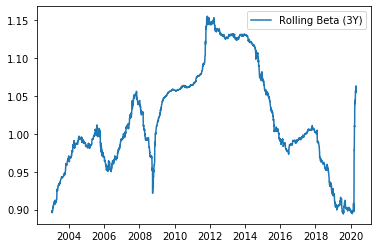

In [28]:

plt.plot(pd.Series(RollCorrel))
plt.legend(["Rolling Beta (3Y)"])

In [29]:
PointerRet = Ret.T.mean()

In [30]:
len(SPX)

5109

In [31]:
len(PointerRet)

5109

In [32]:
df = pd.concat((SPX.T.mean(), Ret.T.mean()), axis=1).dropna()
df.columns = ["SPX", "Basket"]

In [33]:
CorrelRol = {}
for z in range(len(df)-252*3):
    CorrelRol[df.iloc[z+252*3].name] = pd.DataFrame(np.cov(df[z:z+252*3].T)).iloc[0,1] / pd.DataFrame(np.cov(df[z:z+252*3].T)).iloc[1,1]
    

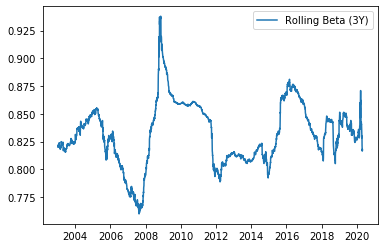

In [34]:
plt.plot(pd.Series(CorrelRol))
plt.legend(["Rolling Beta (3Y)"])

In [351]:
np.cov(df[z:z+252*3].T)

array([[0.00021524, 0.00038793],
       [0.00038793, 0.00130664]])

In [315]:
(pd.DataFrame(np.cov(Pointer.iloc[x:x+252*3])).iloc[0,1] / pd.DataFrame(np.cov(Pointer.iloc[x:x+252*3])).iloc[0,0])

19.748862198392874

In [332]:
Pointer = pd.concat((SPX.T.mean(), Ret.T.mean()), axis=1).dropna()

In [299]:
pd.concat((SPX.T.mean(), Ret.T.mean()), axis=1).iloc[:,0]

2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-04-13   -0.010105
2020-04-14    0.030573
2020-04-15   -0.022030
2020-04-16    0.005817
2020-04-17    0.026794
Name: 0, Length: 5125, dtype: float64

In [307]:
x = 10

In [374]:
pd.DataFrame(np.cov(Pointer.iloc[x:x+252*3])).iloc[0,1] / Pointer.std()[0]**2

-0.02796555080572745

In [379]:
np.cov(Pointer.dropna().iloc[x:x+252*3].T)

array([[0.00018679, 0.00015213],
       [0.00015213, 0.00031476]])

In [309]:
Pointer.std()[0]**2

0.0001570063679338102

In [381]:
np.cov(df[z:z+252*3].T)

array([[0.0001821 , 0.00018676],
       [0.00018676, 0.00026612]])

In [329]:
np.cov(Pointer.dropna().T)

array([[0.00015701, 0.00019956],
       [0.00019956, 0.00041904]])

In [367]:
Ret[:252].T.mean()

2000-01-04   -0.039582
2000-01-05   -0.022516
2000-01-06   -0.043778
2000-01-07    0.056442
2000-01-10    0.073044
                ...   
2000-12-26   -0.007056
2000-12-27    0.038370
2000-12-28    0.009208
2000-12-29   -0.044432
2001-01-02   -0.048954
Length: 252, dtype: float64

In [368]:
Ret[:252]

ticker,DOCU US Equity,WDAY US Equity,AMT US Equity,DLR US Equity,COR US Equity,VZ US Equity,CTXS US Equity,CCI US Equity,OKTA US Equity,ZS US Equity,...,COUP US Equity,TWLO US Equity,ADI US Equity,AMD US Equity,CIEN US Equity,INTC US Equity,MRVL US Equity,AMZN US Equity,MSFT US Equity,VEEV US Equity
field,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,...,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price,Last_Price
2000-01-04,NaN,NaN,-0.010678,NaN,NaN,-0.032326,-0.049269,-0.001025,NaN,NaN,...,NaN,NaN,-0.050590,-0.056452,-0.043820,-0.046694,NaN,-0.083211,-0.033781,NaN
2000-01-05,NaN,NaN,0.030172,NaN,NaN,0.033406,-0.057465,-0.014344,NaN,NaN,...,NaN,NaN,0.014599,0.025641,-0.064630,0.008288,NaN,-0.148747,0.010545,NaN
2000-01-06,NaN,NaN,-0.010444,NaN,NaN,-0.011470,-0.085466,-0.035343,NaN,NaN,...,NaN,NaN,-0.027338,0.066667,-0.077890,-0.058296,NaN,-0.060029,-0.033499,NaN
2000-01-07,NaN,NaN,0.054967,NaN,NaN,-0.007385,0.063095,0.051724,NaN,NaN,...,NaN,NaN,0.028107,0.015625,0.258856,0.041270,NaN,0.061010,0.013069,NaN
2000-01-10,NaN,NaN,0.088175,NaN,NaN,-0.005313,0.113663,0.047131,NaN,NaN,...,NaN,NaN,0.087052,0.076923,0.114719,0.045732,NaN,-0.005391,0.007290,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-26,NaN,NaN,0.016028,NaN,NaN,0.033767,-0.052080,-0.030233,NaN,NaN,...,NaN,NaN,0.048223,-0.013100,-0.036526,-0.001898,-0.139241,0.088351,0.009419,NaN
2000-12-27,NaN,NaN,0.015748,NaN,NaN,0.016332,0.060440,0.000000,NaN,NaN,...,NaN,NaN,0.076271,0.035398,0.076664,-0.009506,0.125012,-0.003719,-0.009331,NaN
2000-12-28,NaN,NaN,0.029324,NaN,NaN,-0.032139,0.002587,0.011990,NaN,NaN,...,NaN,NaN,-0.028121,-0.021368,0.064945,-0.049904,0.160124,0.029630,-0.040377,NaN


In [372]:
Pointer = pd.concat((SPX, Ret["AMT US Equity"]), axis = 1)

In [384]:
Ret.T.mean()

2000-01-04   -0.039582
2000-01-05   -0.022516
2000-01-06   -0.043778
2000-01-07    0.056442
2000-01-10    0.073044
                ...   
2020-04-13    0.001632
2020-04-14    0.049890
2020-04-15   -0.004669
2020-04-16    0.022985
2020-04-17    0.013239
Length: 5125, dtype: float64

In [385]:
SPX.T.mean()

2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2020-04-13   -0.010105
2020-04-14    0.030573
2020-04-15   -0.022030
2020-04-16    0.005817
2020-04-17    0.026794
Length: 5104, dtype: float64

In [23]:
Pointer = pd.concat((SPX.T.mean(), Ret.T.mean()), axis=1).dropna()

In [24]:
CorrDic = {}
for x in range(len(Pointer)-252*3):
    df = Pointer.iloc[x:x+252*3]
    CorrDic[Pointer.index[x+252*3]] = pd.DataFrame(np.cov(df.T)).iloc[1,0] / df.std()[0]**2

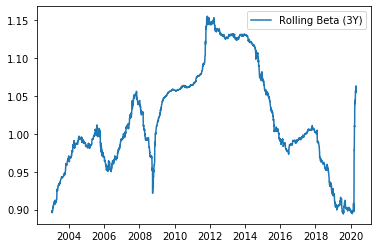

In [25]:
plt.plot(pd.Series(CorrDic))
plt.legend(["Rolling Beta (3Y)"])

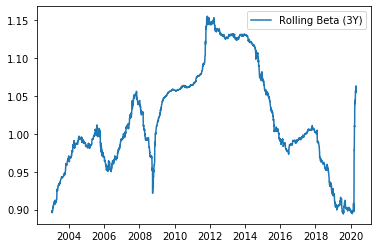

In [26]:
plt.plot(pd.Series(CorrDic))
plt.legend(["Rolling Beta (3Y)"])

In [ ]:
R

In [420]:
np.cov(Ret.T.mean(), SPX.T.mean())[1,0] / SPX.T.mean().std()**2

1.023680760061679

# New Here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

# Bench

In [2]:
Bench = ["SX5E Index"]

Basket = ['CLNX SM','KER FP','MC FP','VIV FP','MTX GR','OR FP','VWS DC','EL FP','SCHN SW','LIN GY','NOVN SW','ERICB SS','SALM NO','VOW3 GR','BMW GR','AKZA NA','CS FP','ML FP','DPW GY','ENEL IM','FRE GY','PHIA NA','ORP FP','ROG SW','SAP GY','SU FP','UCB BB','INGA NA','VNA GY','SIE GR','BN FP','CAP FP','KPN NA','ASML NA']

In [3]:
Bench = blp.bdh(Bench, start_date="20000101", end_date= pd.to_datetime("today").strftime("%Y%m%d"))
Bench = (Bench / Bench.shift(1) -1).iloc[1:]

In [4]:
# Currency Override
df = blp.bdh([x + " Equity" for x in Basket], start_date="20000101", end_date= pd.to_datetime("today").strftime("%Y%m%d"), currency="EUR")

Ret = (df/df.shift(1)-1).iloc[1:]

In [5]:
def AnnRet(Ret):
    return pd.DataFrame(Ret).T.mean().mean() * 252
def AnnVol(Ret):
    return pd.DataFrame(Ret).T.mean().std() * np.sqrt(252)
def Sharpe(Ret):
    return np.sqrt(252) * (pd.DataFrame(Ret).T.mean().mean()) / (pd.DataFrame(Ret).T.mean().std())
def All(Ret):
    return AnnRet(Ret), AnnVol(Ret), Sharpe(Ret)

In [6]:
RetDico = {}
VolDico = {}
positive = pd.Series()
negative = pd.Series()

for annum in Bench.index.year.unique():
    RetDico[annum] = {}
    VolDico[annum] = {}
    for mensis in Bench[Bench.index.year == annum].index.month.unique():
        RetDico[annum][mensis] = Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean().mean()
        VolDico[annum][mensis]= Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean().std()
        if Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean().mean() > 0:
            positive = pd.concat((positive, (Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean())), axis=0)
        else: 
            negative = pd.concat((negative, (Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean())), axis=0)
                
RetDicoRet = {}
VolDicoRet = {}
RetData = {}
positiveRet = pd.Series()
negativeRet = pd.Series()

for annum in Bench.index.year.unique():
    RetDicoRet[annum] = {}
    VolDicoRet[annum] = {}
    for mensis in Bench[Bench.index.year == annum].index.month.unique():
        RetDicoRet[annum][mensis] = Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean().mean()
        VolDicoRet[annum][mensis]= Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean().std()
        if Bench[(Bench.index.year == annum) & (Bench.index.month == mensis)].T.mean().mean() > 0:
            positiveRet = pd.concat((positiveRet, Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean()), axis=0)
        else: 
            negativeRet = pd.concat((negativeRet, Ret[(Ret.index.year == annum) & (Ret.index.month == mensis)].T.mean()), axis=0)
                  

C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\HanaDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a futu

In [7]:
TimeSeries = [Ret.T.mean(),
              Bench.T.mean(),
              Ret.T.mean() - Bench.T.mean(),
              
              positiveRet,
              positive,
              positiveRet - positive,
              
              negativeRet,
              negative,
              negativeRet - negative,
              
              Ret[Ret.index < pd.to_datetime("15-05-2008")].T.mean(),
              Bench[Bench.index < pd.to_datetime("15-05-2008")].T.mean(),
              Ret[Ret.index < pd.to_datetime("15-05-2008")].T.mean() - Bench[Bench.index < pd.to_datetime("15-05-2008")].T.mean(),
              
              Ret[(Ret.index > pd.to_datetime("15-05-2008")) & (Ret.index < pd.to_datetime("03-05-2009"))].T.mean(),
              Bench[(Bench.index > pd.to_datetime("15-05-2008")) & (Bench.index < pd.to_datetime("03-05-2009"))].T.mean(),
              Ret[(Ret.index > pd.to_datetime("15-05-2008")) & (Ret.index < pd.to_datetime("03-05-2009"))].T.mean() - Bench[(Bench.index > pd.to_datetime("15-05-2008")) & (Bench.index < pd.to_datetime("03-05-2009"))].T.mean(),
              
              Ret[(Ret.index > pd.to_datetime("03-05-2009")) & (Ret.index < pd.to_datetime("14-02-2020"))].T.mean(),
              Bench[(Bench.index > pd.to_datetime("03-05-2009")) & (Bench.index < pd.to_datetime("14-02-2020"))].T.mean(),
              Ret[(Ret.index > pd.to_datetime("03-05-2009")) & (Ret.index < pd.to_datetime("14-02-2020"))].T.mean() - Bench[(Bench.index > pd.to_datetime("03-05-2009")) & (Bench.index < pd.to_datetime("14-02-2020"))].T.mean(),
              
              Ret[Ret.index > pd.to_datetime("14-02-2020")].T.mean(),
              Bench[Bench.index > pd.to_datetime("14-02-2020")].T.mean(),
              Ret[Ret.index > pd.to_datetime("14-02-2020")].T.mean() - Bench[Bench.index > pd.to_datetime("14-02-2020")].T.mean()
             ]

In [8]:
result = []

for x in TimeSeries:
    result.append(All(x))

In [9]:
pd.DataFrame(result, columns = ["Ret.", "Vol.", "Sharpe"], index = ["Basket", "Bench.", "Excess Ret", "Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret", "Basket", "Bench.", "Excess Ret"]).T.to_clipboard()

In [10]:
def GetRetPercentage(df):
    Pointer = pd.DataFrame(df).T.mean()
    Pointer = Pointer + 1
    Pointer[0] = 100
    return (Pointer.dropna().cumprod()[-1] / 100 - 1) 

def getRet(Ret):
    TimeSeries = [Ret[(Ret.index > pd.to_datetime("18-02-2020")) & (Ret.index < pd.to_datetime("22-03-2020"))].T.mean(),
                  Bench[(Bench.index > pd.to_datetime("18-02-2020")) & (Bench.index < pd.to_datetime("22-03-2020"))].T.mean(),
                  Ret[(Ret.index > pd.to_datetime("18-02-2020")) & (Ret.index < pd.to_datetime("22-03-2020"))].T.mean() - Bench[(Bench.index > pd.to_datetime("18-02-2020")) & (Bench.index < pd.to_datetime("22-03-2020"))].T.mean(),

                  Ret[Ret.index > pd.to_datetime("22-03-2020")].T.mean(),
                  Bench[Bench.index > pd.to_datetime("22-03-2020")].T.mean(),
                  Ret[Ret.index > pd.to_datetime("22-03-2020")].T.mean() - Bench[Bench.index > pd.to_datetime("22-03-2020")].T.mean(),

                  Ret[Ret.index > pd.to_datetime("18-02-2020")].T.mean(),
                  Bench[Bench.index > pd.to_datetime("18-02-2020")].T.mean(),
                  Ret[Ret.index > pd.to_datetime("18-02-2020")].T.mean() - Bench[Bench.index > pd.to_datetime("18-02-2020")].T.mean()
                 ]
    result = []
    for x in TimeSeries:
        result.append(GetRetPercentage(x))
    return result

In [11]:
pd.DataFrame(getRet(Ret), index = ["Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret","Basket", "Bench.", "Excess Ret"], columns = ["Basket"]).T.to_clipboard()

In [12]:
lista = []
for z in Ret.columns:
    lista.append(getRet(pd.DataFrame(Ret[z])))

In [13]:
pd.DataFrame(lista, index = [x[0] for x in Ret.columns]).to_clipboard()

In [14]:
CorrelRoll = {}

for x in range(len(Ret)-3*252):
    Pointer = pd.concat((Bench.T.mean(), Ret.T.mean()), axis = 1).iloc[x:x+252*3]
    CorrelRoll[Bench.index[3*252+x]] = Pointer.cov().iloc[1,0] / Pointer.cov().iloc[0,0]

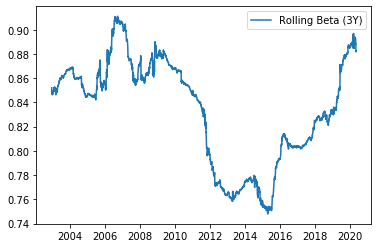

In [15]:
plt.plot(pd.Series(CorrelRoll))
plt.legend(["Rolling Beta (3Y)"])